# Laboratorio 5 - Análisis de sentimientos

## Descripción de los datos 

In [5]:
import pandas as pd

data = pd.read_csv('./data/train.csv')

print(data.head())
print(data.describe())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000


Este dataset que contienen información relacionada con tweets de Twitter que indican desastres naturales.

El dataset contiene 5 columnas:

id: Un identificador único asignado a cada entrada en los datos. Son valores numéricos.

keyword: Una columna que contiene palabras clave o términos relacionados con el evento o la situación. En la muestra proporcionada, esta columna está en blanco (NaN), pero en un conjunto completo de datos, podría contener información valiosa sobre el tema del evento.

location: Otra columna que indica la ubicación relacionada con el evento. Similar a la columna de palabras clave, esta columna también está en blanco (NaN) en la muestra dada, pero podría contener información sobre dónde tuvo lugar el evento.

text: Una columna que contiene texto descriptivo asociado al evento. Es una descripción narrativa de lo que está sucediendo en el evento en cuestión. Los ejemplos proporcionados muestran que esta columna contiene información sobre incendios forestales, evacuaciones y terremotos.

target: Esta columna indica un valor binario (0 o 1). Un valor de 1 indica que si fue un desastre natural, mientras que un valor de 0 indicar que no lo fue.

## Limpieza y procesamiento de datos

Realizaremos la limpieza de datos y el procesamiento de texto para que los datos estén listos para el modelado. En este caso, el procesamiento de texto incluye la tokenización, la eliminación de palabras vacías y la lematización. 

Convertir el texto a mayúsculas o minúsculas:

Propósito: Uniformizar el texto en un solo formato (mayúsculas o minúsculas) para reducir la variabilidad y facilitar comparaciones y búsquedas.
Quitar caracteres especiales como "#", "@", apóstrofes, etc.:

Propósito: Eliminar caracteres que no aportan información relevante para la mayoría de las tareas de procesamiento de texto y que podrían interferir con el análisis posterior.
Quitar las URLs:

Propósito: Eliminar enlaces a sitios web, ya que generalmente no aportan información semántica al análisis y pueden ser tratados como ruido.
Revisar y quitar emoticones:

Propósito: Los emoticones a menudo son símbolos que representan emociones o sentimientos, pero pueden ser difíciles de interpretar automáticamente. Si no son relevantes para la tarea, se pueden eliminar para reducir el ruido.
Quitar los signos de puntuación:

Propósito: Los signos de puntuación como comas, puntos, etc., generalmente no contribuyen directamente al análisis de texto y se eliminan para simplificar el texto y reducir la dimensionalidad.
Quitar artículos, preposiciones y conjunciones (stopwords):

Propósito: Las stopwords son palabras comunes que suelen tener poco valor semántico en el análisis de texto (por ejemplo, "el", "de", "y"). Eliminarlas puede ayudar a reducir la dimensionalidad y centrarse en las palabras clave más significativas.
Quitar números:

Propósito: En algunas tareas, los números pueden no ser relevantes y, en lugar de aportar información, podrían generar ruido. Sin embargo, es importante tener en cuenta si los números son importantes para la tarea específica antes de eliminarlos, como en el ejemplo del "911".

In [6]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_urls(text):
    # Eliminar URLs que comienzan con http o https
    text = re.sub(r'http\S+', '', text)
    # Eliminar URLs que comienzan con www
    text = re.sub(r'www\S+', '', text)
    return text

# Aplicar la función a la columna 'text' del DataFrame
data['text'] = data['text'].apply(remove_urls)


# Quitar caracteres especiales: "#, @"
for i in range(len(data)):
    data.loc[i, 'text'] = data.loc[i, 'text'].replace('#', '')
    data.loc[i, 'text'] = data.loc[i, 'text'].replace('@', '')


# Quitar los signos de puntuacion
for i in range(len(data)):
    data.loc[i, 'text'] = data.loc[i, 'text'].translate(str.maketrans('', '', string.punctuation))

def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F700-\U0001F77F"  # alchemical symbols
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251"  
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", text)


# Quitar emojis si hubiese usando remove_emojis
for i in range(len(data)):
    data.loc[i, 'text'] = remove_emojis(data.loc[i, 'text'])

# Quitar los artículos, preposiciones y conjunciones (stopwords)
nltk.download('stopwords')

stop = stopwords.words('english')
for i in range(len(data)):
    data.loc[i, 'text'] = ' '.join([word for word in data.loc[i, 'text'].split() if word not in (stop)])

# Convertir texto a mayusculas
for i in range(len(data)):
    data.loc[i, 'text'] = data.loc[i, 'text'].upper()

# # Tokenizar el texto
# nltk.download('punkt')

# data['text'] = data['text'].apply(word_tokenize)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Juan_Avila\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
print(data.head())

   id keyword location                                               text  \
0   1     NaN      NaN   OUR DEEDS REASON EARTHQUAKE MAY ALLAH FORGIVE US   
1   4     NaN      NaN              FOREST FIRE NEAR LA RONGE SASK CANADA   
2   5     NaN      NaN  ALL RESIDENTS ASKED SHELTER PLACE NOTIFIED OFF...   
3   6     NaN      NaN  13000 PEOPLE RECEIVE WILDFIRES EVACUATION ORDE...   
4   7     NaN      NaN  JUST GOT SENT PHOTO RUBY ALASKA SMOKE WILDFIRE...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  


## Frecuencia de palabras

In [8]:
disaster_tweets = data[data['target'] == 1]['text'].str.cat(sep=' ')
non_disaster_tweets = data[data['target'] == 0]['text'].str.cat(sep=' ')

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Tokenizar y filtrar stopwords
disaster_tokens = [word for word in word_tokenize(disaster_tweets, language='english') if word.lower() not in stop_words]
non_disaster_tokens = [word for word in word_tokenize(non_disaster_tweets, language='english') if word.lower() not in stop_words]

# Obtener frecuencias
disaster_freq = FreqDist(disaster_tokens)
non_disaster_freq = FreqDist(non_disaster_tokens)

print("Frecuencia de palabras en tweets de desastres:")
print(disaster_freq.most_common(10))
print("Frecuencia de palabras en tweets no desastres:")
print(non_disaster_freq.most_common(10))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Juan_Avila\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Frecuencia de palabras en tweets de desastres:
[('FIRE', 178), ('NEWS', 136), ('VIA', 121), ('DISASTER', 117), ('CALIFORNIA', 111), ('SUICIDE', 110), ('POLICE', 107), ('AMP', 106), ('PEOPLE', 105), ('KILLED', 93)]
Frecuencia de palabras en tweets no desastres:
[('LIKE', 253), ('IM', 243), ('AMP', 192), ('NEW', 168), ('GET', 163), ('DONT', 141), ('ONE', 128), ('BODY', 112), ('VIA', 99), ('WOULD', 97)]


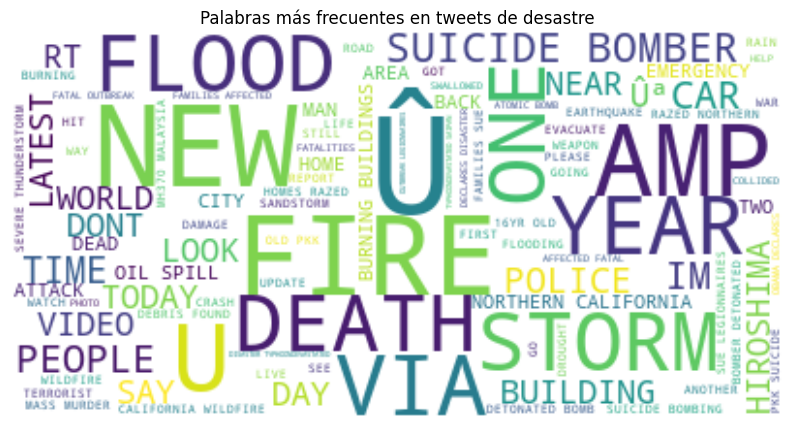

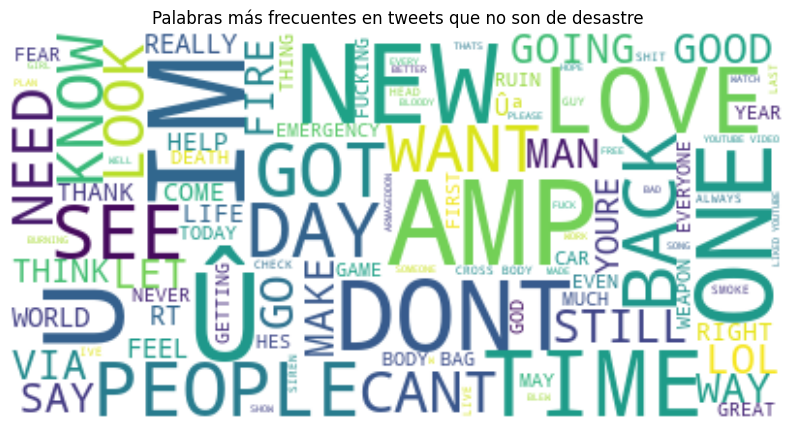

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(text, title):
    wordcloud = WordCloud(max_font_size=70, max_words=100, background_color="white").generate(text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    plt.show()

# Crear nubes de palabras para tweets de desastre y no desastre
plot_wordcloud(disaster_tweets, 'Palabras más frecuentes en tweets de desastre')
plot_wordcloud(non_disaster_tweets, 'Palabras más frecuentes en tweets que no son de desastre')


In [10]:
from nltk.util import bigrams, trigrams

disaster_bigrams = list(bigrams(disaster_tokens))
disaster_trigrams = list(trigrams(disaster_tokens))

non_disaster_bigrams = list(bigrams(non_disaster_tokens))
non_disaster_trigrams = list(trigrams(non_disaster_tokens))

disaster_bigram_freq = FreqDist(disaster_bigrams)
non_disaster_bigram_freq = FreqDist(non_disaster_bigrams)

disaster_trigram_freq = FreqDist(disaster_trigrams)
non_disaster_trigram_freq = FreqDist(non_disaster_trigrams)


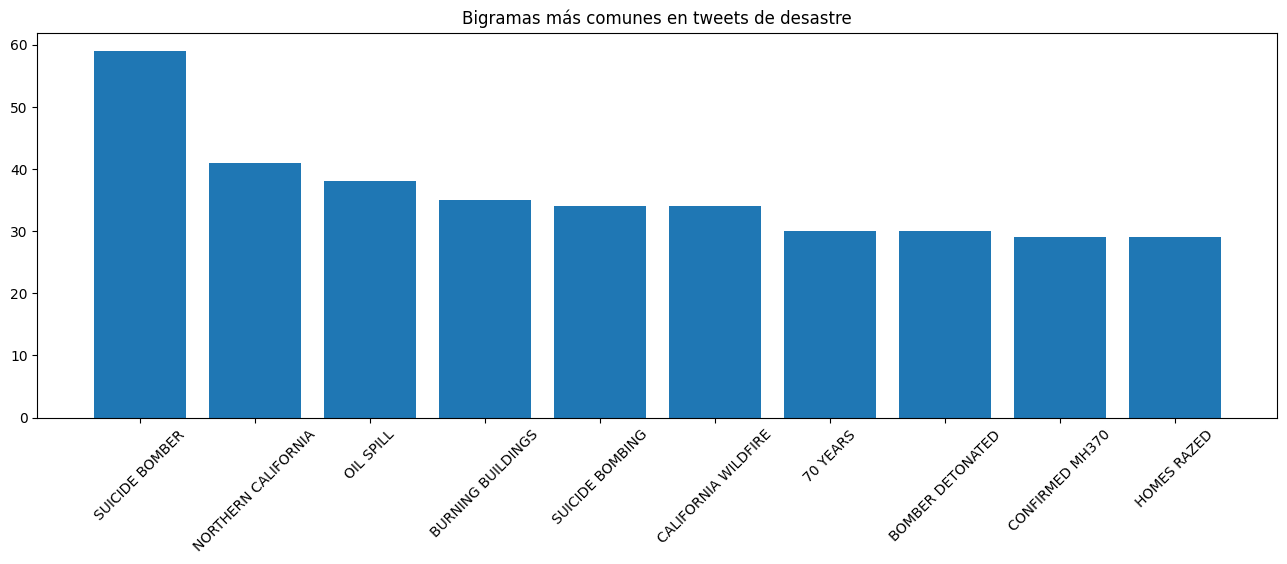

c:\Users\Juan_Avila\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


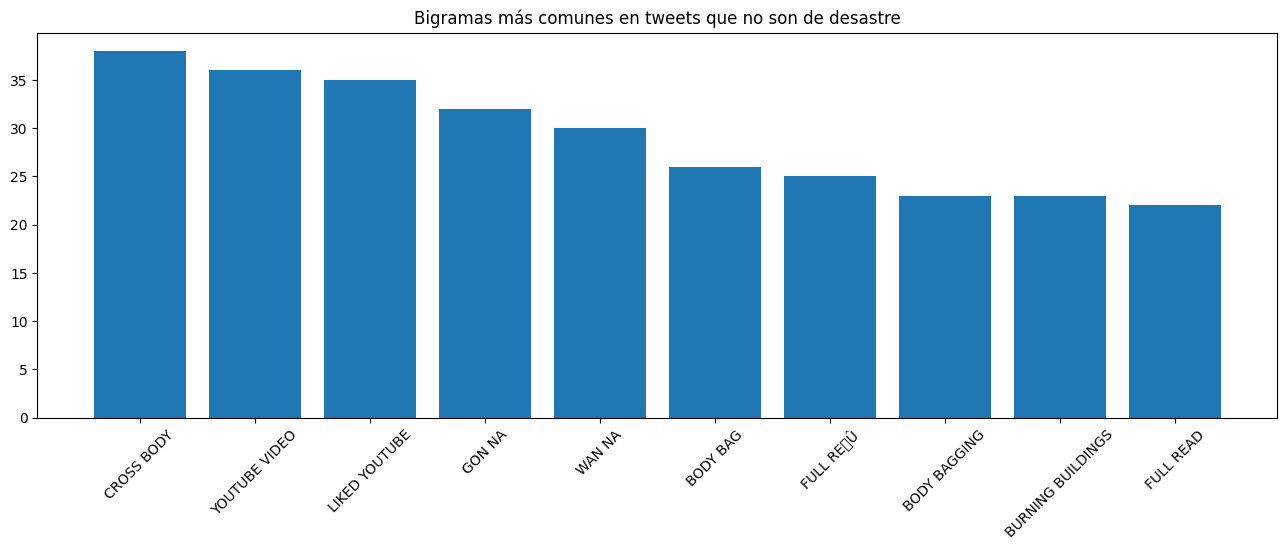

In [11]:
def plot_most_common_bigrams(freq_dist, title):
    bigrams, frequencies = zip(*freq_dist.most_common(10))
    bigrams_str = [' '.join(bigram) for bigram in bigrams]  # Convertir bigramas a cadenas para la visualización
    plt.figure(figsize=(16, 5))
    plt.bar(bigrams_str, frequencies)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_most_common_bigrams(disaster_bigram_freq, 'Bigramas más comunes en tweets de desastre')
plot_most_common_bigrams(non_disaster_bigram_freq, 'Bigramas más comunes en tweets que no son de desastre')


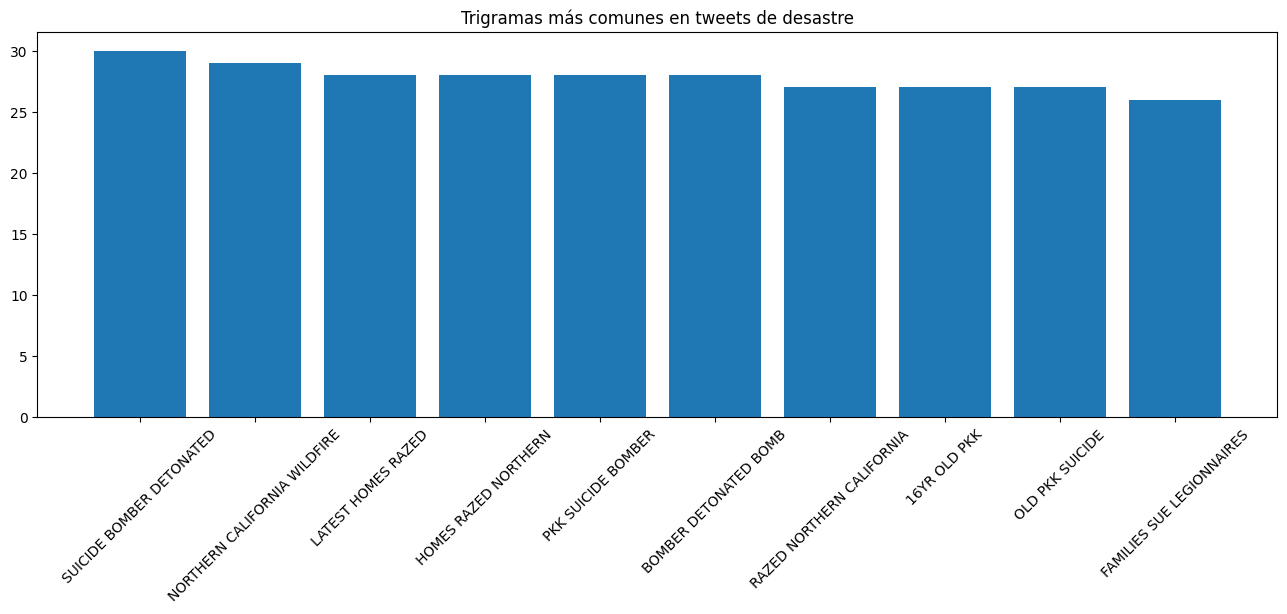

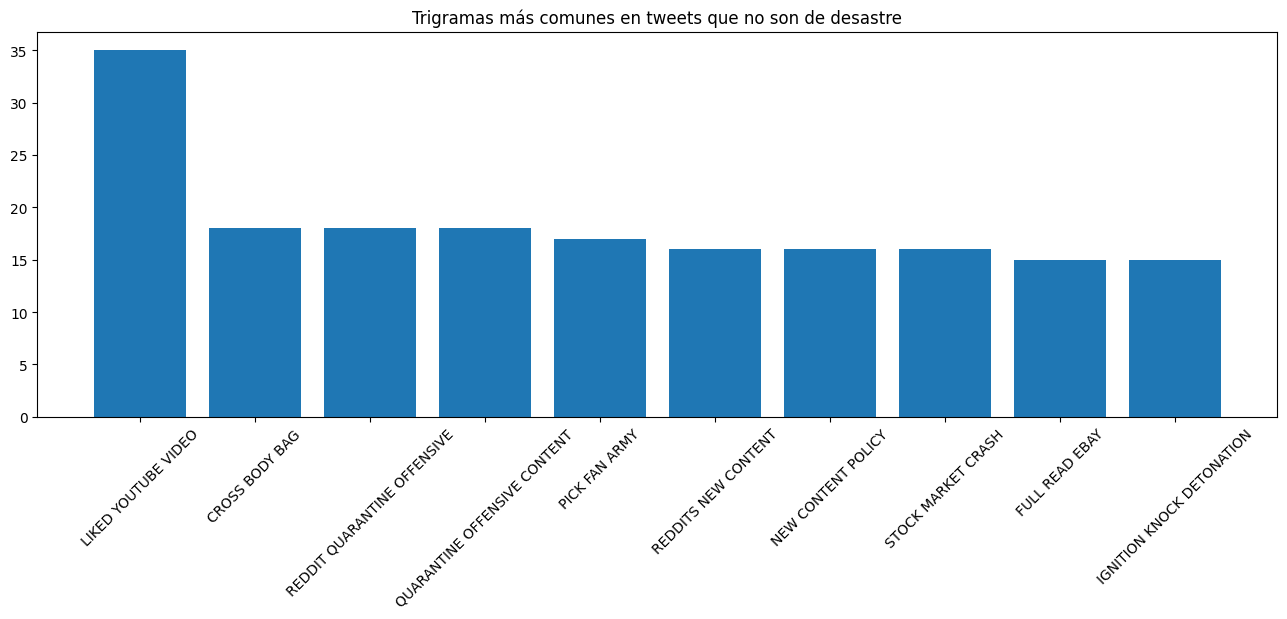

In [12]:
def plot_most_common_trigrams(freq_dist, title):
    trigrams, frequencies = zip(*freq_dist.most_common(10))
    trigrams_str = [' '.join(trigram) for trigram in trigrams]  # Convertir trigramas a cadenas para la visualización
    plt.figure(figsize=(16, 5))
    plt.bar(trigrams_str, frequencies)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_most_common_trigrams(disaster_trigram_freq, 'Trigramas más comunes en tweets de desastre')
plot_most_common_trigrams(non_disaster_trigram_freq, 'Trigramas más comunes en tweets que no son de desastre')


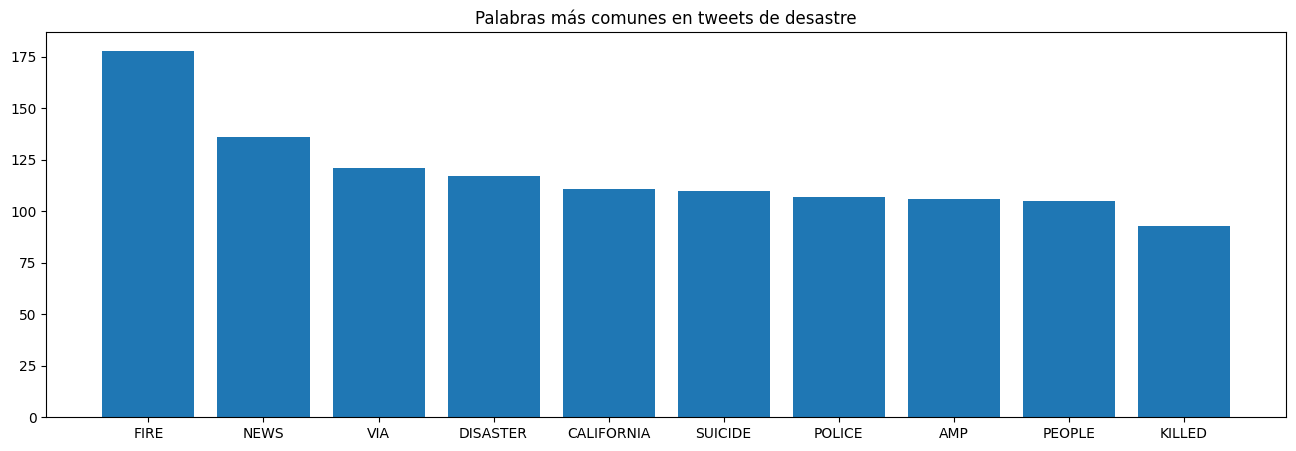

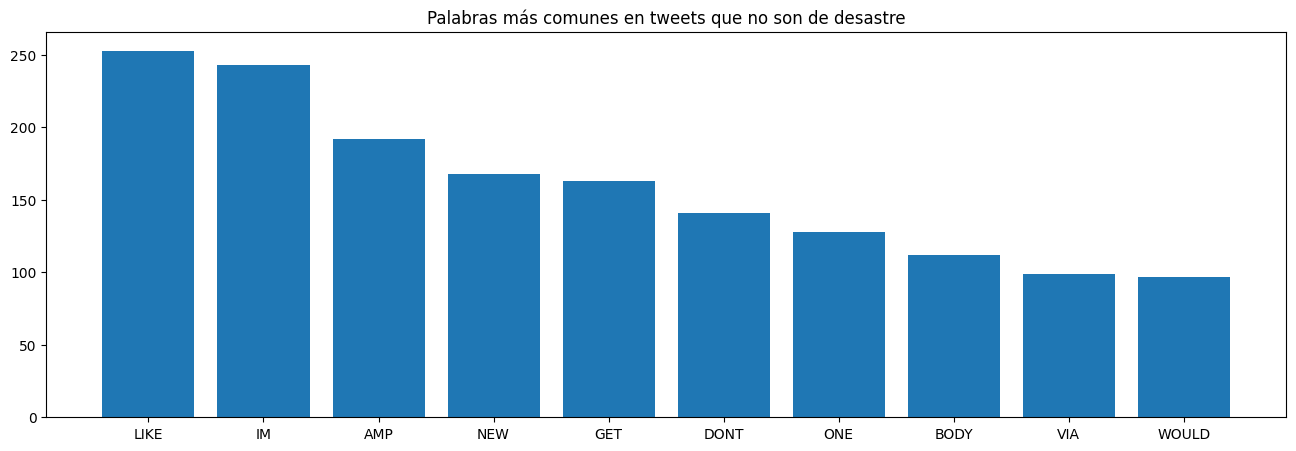

In [13]:
import matplotlib.pyplot as plt

def plot_most_common(freq_dist, title):
    words, frequencies = zip(*freq_dist.most_common(10))
    plt.figure(figsize=(16, 5))
    plt.bar(words, frequencies)
    plt.title(title)
    plt.show()

plot_most_common(disaster_freq, 'Palabras más comunes en tweets de desastre')
plot_most_common(non_disaster_freq, 'Palabras más comunes en tweets que no son de desastre')


Como se puede observar en los histogramas de los digramas sí puede ayudar bastante ya que estos nos pueden indicar cuales son las palabras que más se repiten en los tweets que hablan de desastres naturales y cuales son las que más se repiten en los tweets que no hablan de desastres naturales.

Ademas de eso puede hacer una mejor ayuda para la clasificación de los tweets ya que se puede observar que en los tweets que hablan de desastres naturales se repiten palabras como: fire, california, news, etc. Y en los tweets que no hablan de desastres naturales se repiten palabras como: love, day, time, etc.

In [16]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
stop_words = set(stopwords.words('english'))

for tweet in data['text']:
    # tokens = [word for word in word_tokenize(tweet, language='english') if word.lower() not in stop_words]
    tokens = word_tokenize(tweet, language='english')
    
    sentiments = []
    for token in tokens:       
        sentiment_scores = sia.polarity_scores(token)
        compound = sentiment_scores['compound']
        
        if compound >= 0.05:
            sentiments.append("positive")
        elif compound <= -0.05:
            sentiments.append("negative")
        else:
            sentiments.append("neutral")
    
    positive_count = sentiments.count("positive")
    negative_count = sentiments.count("negative")

    score = (positive_count - negative_count) / len(sentiments)

    # Asignar el valor de la polaridad al tweet a el DataFrame
    data.loc[data['text'] == tweet, 'sentiment'] = score

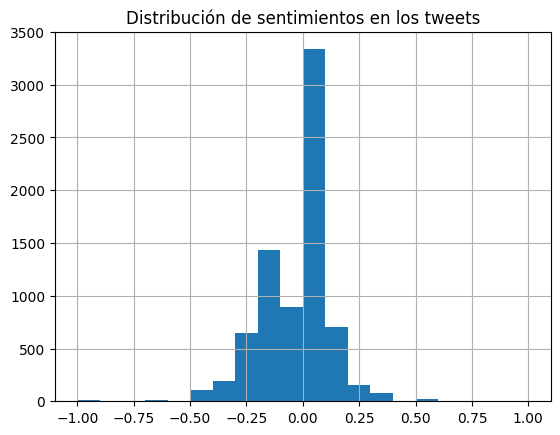

In [17]:
# Hacer un histograma de los sentimientos
data['sentiment'].hist(bins=20)
plt.title('Distribución de sentimientos en los tweets')
plt.show()


In [28]:
# 10 tweets más positivos
print("10 tweets más positivos:")
positive_tweets = data.sort_values(by=['sentiment'], ascending=False)[['text', 'sentiment', 'target']].head(10)
positive_tweets['target'] = positive_tweets['target'].apply(lambda x: 'Desastre' if x == 1 else 'No-desastre')
print(positive_tweets)

# 10 tweets más negativos
print("10 tweets más negativos:")
negative_tweets = data.sort_values(by=['sentiment'], ascending=True)[['text', 'sentiment', 'target']].head(10)
negative_tweets['target'] = negative_tweets['target'].apply(lambda x: 'Desastre' if x == 1 else 'No-desastre')
print(negative_tweets)

10 tweets más positivos:
                               text  sentiment       target
2727                       GOOD LOL   1.000000  No-desastre
6140          SUPER SWEET BEAUTIFUL   1.000000  No-desastre
4496        GUYREGINALD LOL WELCOME   0.666667  No-desastre
21                      LONDON COOL   0.500000  No-desastre
6283                    READY STORM   0.500000     Desastre
3646    SHARING HELP COUSINS FAMILY   0.500000  No-desastre
6174                     YAY SIRENS   0.500000  No-desastre
17                    SUMMER LOVELY   0.500000  No-desastre
27                  LOVE GIRLFRIEND   0.500000  No-desastre
6562  SURVIVED SPANISH SWEET RITUAL   0.500000  No-desastre
10 tweets más negativos:
                                                   text  sentiment  \
3688                                           FATALITY       -1.0   
3717                                         WORST FEAR       -1.0   
20                                           RIDICULOUS       -1.0   
481       

No son mas negativos ya que se encuentra un registro de desastre tanto en positivos como negativos. Esto se puede dar ya que aunque el tweet sea negativo no necesariamente habla de un desastre natural y viceversa.

## Modelo de clasificación

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.sparse import hstack

X_text = data['text']
X_sentiment = data['sentiment'].values.reshape(-1, 1)  # Convertimos a una matriz columna
Y = data['target']

X_train_text, X_test_text, X_train_sentiment, X_test_sentiment, y_train, y_test = train_test_split(
    X_text, X_sentiment, Y, test_size=0.3, random_state=456)

# Vectorizar el texto usando TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

# Concatenar las características de texto vectorizadas con las características de sentimiento
X_train_combined = hstack([X_train_tfidf, X_train_sentiment])
X_test_combined = hstack([X_test_tfidf, X_test_sentiment])

# Entrenar un modelo de Regresión Logística
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_combined, y_train)

# Evaluar la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, clf.predict(X_test_combined))
print(accuracy)


0.8104203152364273


Aunque no fue significativa la mejora, si aumento el accuracy del modelo. Esto se puede dar ya que al eliminar las palabras que no aportan información al modelo, se puede dar una mejor clasificación de los tweets.